## House Prices: Model Training

### Multiple Linear Regression, Decision Tree, Random Forests, & Deep Neural Network

- Given our cleaned & preprocessed data we will build 4 different models & evaluate them using k-fold cross validation with 15 folds 

- The best performing model will be chosen as our model of choice

In [1]:
# Packages to import

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import r2_score

In [2]:
# Importing data

preprocessed_data= pd.read_csv("preprocessed_data.csv")
preprocessed_data=preprocessed_data.drop('Unnamed: 0',axis=1)

In [3]:
preprocessed_data.head()

,MSSubClass,MSZoning=C (all),MSZoning=FV,MSZoning=RH,MSZoning=RL,MSZoning=RM,LotFrontage,LotArea,Street=Grvl,Street=Pave,...,SaleType=New,SaleType=Oth,SaleType=WD,SaleCondition=Abnorml,SaleCondition=AdjLand,SaleCondition=Alloca,SaleCondition=Family,SaleCondition=Normal,SaleCondition=Partial,SalePrice
0,60,0,0,0,1,0,65.0,8450,0,1,...,0,0,1,0,0,0,0,1,0,208500.0
1,20,0,0,0,1,0,80.0,9600,0,1,...,0,0,1,0,0,0,0,1,0,181500.0
2,60,0,0,0,1,0,68.0,11250,0,1,...,0,0,1,0,0,0,0,1,0,223500.0
3,70,0,0,0,1,0,60.0,9550,0,1,...,0,0,1,1,0,0,0,0,0,140000.0
4,60,0,0,0,1,0,84.0,14260,0,1,...,0,0,1,0,0,0,0,1,0,250000.0


In [4]:
# Shuffling data

preprocessed_data = preprocessed_data.sample(frac=1).reset_index(drop=True)
preprocessed_data.head()

,MSSubClass,MSZoning=C (all),MSZoning=FV,MSZoning=RH,MSZoning=RL,MSZoning=RM,LotFrontage,LotArea,Street=Grvl,Street=Pave,...,SaleType=New,SaleType=Oth,SaleType=WD,SaleCondition=Abnorml,SaleCondition=AdjLand,SaleCondition=Alloca,SaleCondition=Family,SaleCondition=Normal,SaleCondition=Partial,SalePrice
0,160,0,0,0,0,1,21.0,1680,0,1,...,0,0,0,1,0,0,0,0,0,112000.0
1,50,0,0,0,1,0,59.0,16466,0,1,...,0,0,1,0,0,0,0,1,0,135500.0
2,60,0,0,0,1,0,68.0,8935,0,1,...,0,0,1,0,0,0,0,1,0,195000.0
3,90,0,0,0,1,0,60.0,7200,0,1,...,0,0,1,0,0,0,0,1,0,90000.0
4,160,0,0,0,1,0,75.0,10762,0,1,...,0,0,1,0,0,0,0,1,0,120000.0


In [5]:
# Seperating predictors from response

X=preprocessed_data.drop('SalePrice',axis=1)
y=preprocessed_data['SalePrice']

In [9]:
# Lists to hold model residuals when tested

mlr_residuals=[]
dstree_residuals=[]
randomforest_residuals=[]

# Functions to pass onto k folds

def get_mse(model,X_train,X_test,y_train,y_test,residual=None):
    
    model.fit(X_train,y_train)
    
    if residual=="mlr":
        mlr_residuals.append((model.predict(X_test)-y_test).values.tolist())
        
    if residual=="dstree":
        dstree_residuals.append((model.predict(X_test)-y_test).values.tolist())
        
    if residual=="randomforest":
        randomforest_residuals.append((model.predict(X_test)-y_test).values.tolist())

        

    return mean_squared_error(model.predict(X_test),y_test)

def get_score(model,X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [10]:
# Defining k=15 for cross validation

kf=KFold(n_splits=15)

## Choosing Hyperpatameters: Decision Tree

In [13]:
# List to keep track of testing data score for hyperparameters

score_dstree_hyperparameter=[]

# List of Hyperparameters
hyperparameters=list(range(1, 500))

for i in (hyperparameters):


    print(i)
    
    scores=[]
    
    for train,test in kf.split(X):
        X_train,X_test,y_train,y_test=X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]
    
        scores.append(get_score(DecisionTreeRegressor(max_depth=i),X_train,X_test,y_train,y_test))
    
    score_dstree_hyperparameter.append(sum(scores)/len(scores))
    

clear_output(wait=True)  
        
print("done")

done


### Hyperparameter Plot : Decision Trees

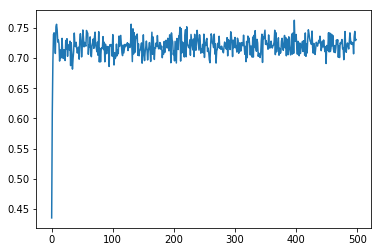

Best Hyperparameter for Decision Trees is 398 with value of 0.7628868063964286


In [15]:
plt.plot(score_dstree_hyperparameter)
plt.show()

print("Best Hyperparameter for Decision Trees is {} with value of {}".format(hyperparameters[score_dstree_hyperparameter.index(max(score_dstree_hyperparameter))],max(score_dstree_hyperparameter)))


## Choosing Hyperpatameters: Random Forests

In [16]:
# List to keep track of testing data score for hyperparameters

score_randomForest_hyperparameter=[]

# List of Hyperparameters

hyperparameters=list(range(1, 1000,100))


for i in(hyperparameters):
    
    print(i)
    
    scores=[]
    for train,test in kf.split(X,y):
        X_train,X_test,y_train,y_test=X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]
    
    
        scores.append(get_score(RandomForestRegressor(n_estimators=i),X_train,X_test,y_train,y_test))
    
    score_randomForest_hyperparameter.append(sum(scores)/len(scores))
    
clear_output(wait=True)      
print("done")
       


done


### Hyperparameter Plot : Random Forests

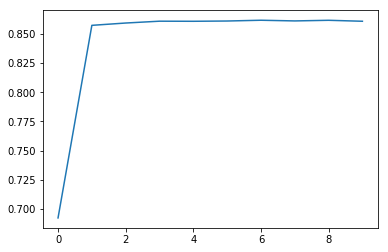

Best Hyperparameter for Random Forest is 601 with value of 0.8617484885919687


In [19]:
plt.plot(score_randomForest_hyperparameter)
plt.show()


print("Best Hyperparameter for Random Forest is {} with value of {}".format(hyperparameters[score_randomForest_hyperparameter.index(max(score_randomForest_hyperparameter))],max(score_randomForest_hyperparameter)))

## Running 15-Fold Cross Validation for 3 Models-(MLR, Decision Tree, Random Forests) with hyperparameters chosen from above

### Models will be trained and tested, scores for tests will be saved, as well as residuals on predictions on testing data

In [11]:
score_regression=[]
score_dstree=[]
score_randomForest=[]

mse_regression=[]
mse_dstree=[]
mse_randomForest=[]

score_randomForest_hyperparameter=[]


for iterations in range(1,5):
    print(iterations)
    preprocessed_data = preprocessed_data.sample(frac=1).reset_index(drop=True)
    X=preprocessed_data.drop('SalePrice',axis=1)
    y=preprocessed_data['SalePrice']
    
    for train,test in kf.split(X):
        X_train,X_test,y_train,y_test=X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]
    
        score_regression.append(get_score(LinearRegression(),X_train,X_test,y_train,y_test))
        mse_regression.append(get_mse(LinearRegression(),X_train,X_test,y_train,y_test,residual="mlr"))
    
        score_dstree.append(get_score(DecisionTreeRegressor(max_depth=398),X_train,X_test,y_train,y_test))
        mse_dstree.append(get_mse(DecisionTreeRegressor(max_depth=398),X_train,X_test,y_train,y_test,residual="dstree"))

        score_randomForest.append(get_score(RandomForestRegressor(n_estimators=601),X_train,X_test,y_train,y_test))
        mse_randomForest.append(get_mse(RandomForestRegressor(n_estimators=601),X_train,X_test,y_train,y_test,residual="randomforest"))

clear_output(wait=True) 
mlr_residuals = [item for sublist in mlr_residuals for item in sublist]
dstree_residuals = [item for sublist in dstree_residuals for item in sublist]
randomforest_residuals = [item for sublist in randomforest_residuals for item in sublist]

print("done")

done


## Model Evaluation: Multiple Linear Regression

Text(0.5, 0, 'Residual')

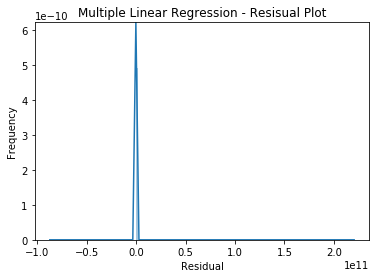

In [12]:
plot=sns.distplot(mlr_residuals,bins=150)
plot.set_title('Multiple Linear Regression - Resisual Plot')
plot.set_ylabel('Frequency')
plot.set_xlabel('Residual')



Mean R2 Score: 0.8320604011851371
Mean Residual: 524866465.2638822


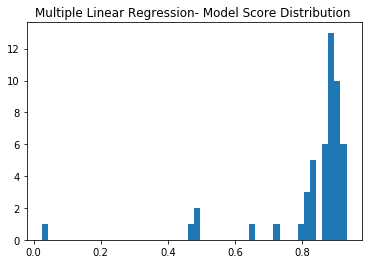

In [13]:
score_regression = [i for i in score_regression if i > 0]

print("Mean R2 Score: {}".format(sum(score_regression)/len(score_regression)))
print("Mean Residual: {}".format(np.sqrt(mse_regression).mean()))

plt.hist(score_regression,bins=len(score_regression))
plt.title("Multiple Linear Regression- Model Score Distribution ")
plt.show()

### Observations:

* Residual Plot follows a Normal Distribution, however some of the values seem to be exploding which may indicate a problem with the intercept bias term (more investigation will be required)

* R^2 Score is an average of 0.83 which indicates a fairly well performing model

* This is a fair model if we ignore the exploding values, but other more flexible more can performe slightly better

## Model Evaluation: Decision Tree

Text(0.5, 0, 'Residual')

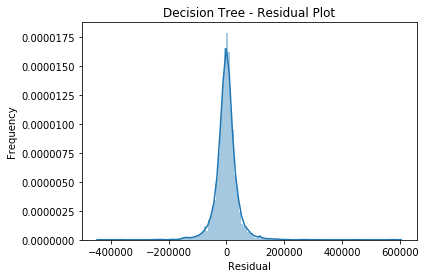

In [23]:
plot=sns.distplot(dstree_residuals,bins=150)
plot.set_title('Decision Tree - Residual Plot')
plot.set_ylabel('Frequency')
plot.set_xlabel('Residual')


Mean R2 Score: 0.7251633273054522
Mean Residual: 38818.65632527293


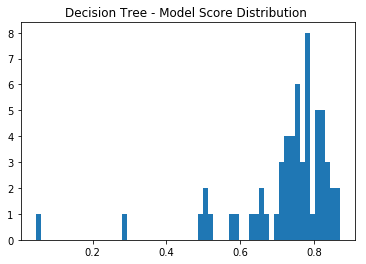

In [43]:
print("Mean R2 Score: {}".format(sum(score_dstree)/len(score_dstree)))
print("Mean Residual: {}".format(np.sqrt(mse_dstree).mean()))

plt.hist(score_dstree,bins=len(score_dstree))
plt.title("Decision Tree - Model Score Distribution ")
plt.show()

### Observations:

* Residual Plot follows a Normal Distribution with mean 0, indicating our model captured the variability in our target variable properly

* R^2 Score is the lowest with a value of 0.72, room for improvement is required

* Distribution of Scores show that model fails to acheive high R^2 score of over .90 indicating poor model

## Model Evaluation: Random Forests

Text(0.5, 0, 'Residual')

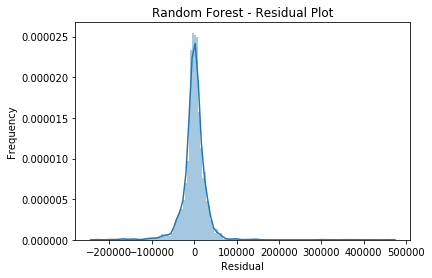

In [25]:
plot=sns.distplot(randomforest_residuals,bins=150)
plot.set_title('Random Forest - Residual Plot')
plot.set_ylabel('Frequency')
plot.set_xlabel('Residual')

Mean R2 Score: 0.8594250257181076
Mean Residual: 28636.826464613438


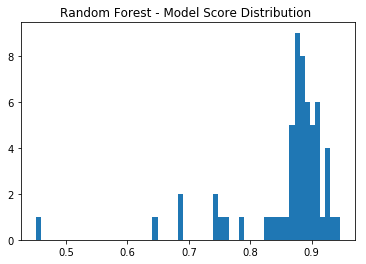

In [44]:
print("Mean R2 Score: {}".format(sum(score_randomForest)/len(score_randomForest)))
print("Mean Residual: {}".format(np.sqrt(mse_randomForest).mean()))

plt.hist(score_randomForest,bins=len(score_randomForest))
plt.title("Random Forest - Model Score Distribution ")
plt.show()

### Observations:

* Residual Plot follows a Normal Distribution with mean 0, indicating our model captured the variability in our target variable properly

* Average R^2 Score is very high with value of ≈ 0.86, highest score among all models

* Distribution of score are relatively high, peaks being around 0.9, and some small instances of low score(may indicate biased testing set)


## Deep Neural Network

#### We will build a Deep Neural Network with the following specifications

* 2 hidden layers with 150 neurons & RELU activation functions
* 2 hidden layers with 100 neurons & RELU activation functions
* 3 hidden layers with 75 neurons & RELU activation functions
* 3 hidden layers with 50 neurons & RELU activation functions
* 1 hidden layer with 10 neurons & RELU activation functions
* output layer


In [33]:
residuals=[]

errors_training=[]
errors_testing=[]



for iteration in range(1,5):
    count=0
    preprocessed_data = preprocessed_data.sample(frac=1).reset_index(drop=True)
    X=preprocessed_data.drop('SalePrice',axis=1)
    y=preprocessed_data['SalePrice']
    
    for train,test in kf.split(X):
        print("Iteration number {} for Training no. {}".format(count,iteration))
        X_train,X_test,y_train,y_test=X.iloc[train],X.iloc[test],y.iloc[train],y.iloc[test]
    
        model=Sequential()
        model.add(Dense(150,input_shape=X_train.shape[1:],activation="relu"))
        model.add(Dense(150,activation="relu"))
        model.add(Dense(100,activation="relu"))
        model.add(Dense(100,activation="relu"))
        model.add(Dense(75,activation="relu"))
        model.add(Dense(75,activation="relu"))
        model.add(Dense(75,activation="relu"))
        model.add(Dense(50,activation="relu"))
        model.add(Dense(50,activation="relu"))
        model.add(Dense(50,activation="relu"))
        model.add(Dense(10,activation="relu"))
        model.add(Dense(1,))
        model.compile(Adam(lr=0.005),"mean_squared_error")
    
        history=model.fit(X_train,y_train,epochs=500,validation_split=0.3,verbose=1)
        clear_output(wait=True) 
    
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)
    
        for i in range(0,97):
            len(y_test_pred)
            residuals.append(y_test.values[i]-(y_test_pred)[i][0])
    
    
        errors_training.append(r2_score(y_train,y_train_pred))
    
    
        errors_testing.append(r2_score(y_test,y_test_pred))
    
        count=count+1
    
        
clear_output(wait=True) 

print("done")

done


In [45]:
errors_testing = [i for i in errors_testing if i > 0]
errors_training = [i for i in errors_training if i > 0]

## Model Evaluation: Deep Neural Network

Text(0.5, 0, 'Residual')

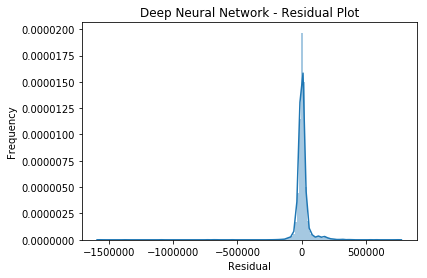

In [35]:

plot=sns.distplot(residuals,bins=150)
plot.set_title('Deep Neural Network - Residual Plot')
plot.set_ylabel('Frequency')
plot.set_xlabel('Residual')

Mean R2 Score(Training): 0.9061974816025521
Mean R2 Score(Testing): 0.8429433304106878


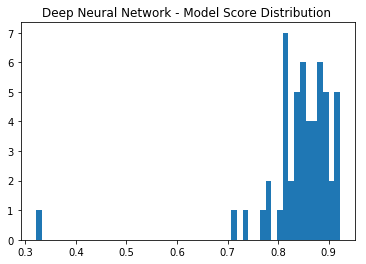

In [48]:

print("Mean R2 Score(Training): {}".format(sum(errors_training)/len(errors_training)))
print("Mean R2 Score(Testing): {}".format(sum(errors_testing)/len(errors_testing)))

plt.hist(errors_testing,bins=len(errors_testing))
plt.title("Deep Neural Network - Model Score Distribution ")
plt.show()

## Observations

* Residual Plot follows a Normal Distribution, however some of the values seem to be exploding(which have been removed from the plot) which may indicate a problem with the intercept bias term (more investigation will be required)

* R^2 Scores are relatively high, with average score of 0.84 however the Score Distribution would suggest that only an outlier case of low score caused a value of 0.84 othwerwise it would be higher

* Score Distribution indicates that 95% of instances had score over 0.7

* This would be the best model had it not been for the exploding values

## Conclusions

#### Model Performance Summaries:

* Multiple Linear Regression: 0.83
* Decision Tree: 0.72
* Random Forets: 0.86
* Deep Neural Network: 0.84




Our predictive model of choice was Random Forests which outperformed all the other models, Multiple Linear Regression & Deep Neural Networks came in second